In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from datetime import datetime 
API_KEY = '09d7859f71b9796ca3b1e0c50da15d5b'
plt.style.use('ggplot')

http://strftime.org/

## Create function to call api given `category_id`

In [2]:
def api_category(category_id,api_key):
    url = 'http://api.eia.gov/category/'
    payload = {'api_key':api_key,
               'category_id':category_id}
    r = requests.get(url, params=payload)
    return r.json()

## Create function to call api given `series_id`

In [3]:
def api_series(series_id,api_key):
    '''calls api returns json data'''
    url = 'http://api.eia.gov/series/'
    payload = {'api_key':api_key,
               'series_id':series_id}
    r = requests.get(url, params=payload)
    return r.json()

## Create a function thar returns a dataframe given api call data

In [4]:
def data_frame(dic):
    '''convert dictionary data into dataframe'''
    # if statement to convert date
    if dic['series'][0]['f'] == 'M':
        #201002
        fmat = '%Y%m'
    else:
        fmat= None
    # select data
    plot_data = dic['series'][0]['data']
    # create dataframe
    df = pd.DataFrame.from_dict(plot_data)
    # rename cols
    df.rename(columns={0: 'date',1: 'value',}, 
              inplace=True)
    # change to datetime index
    df.date = pd.to_datetime(df['date'],format=fmat)
    df.set_index('date', inplace=True)
    return df

In [5]:
def data_frame_name(dic):
    '''convert dictionary data into dataframe'''
    # if statement to convert date
    if dic['series'][0]['f'] == 'M':
        #201002
        fmat = '%Y%m'
    else:
        fmat= None
    # select data
    name =  dic['series'][0]['series_id']
    plot_data = dic['series'][0]['data']
    # create dataframe
    df = pd.DataFrame.from_dict(plot_data)
    # rename cols
    df.rename(columns={0: 'date',1: name,}, 
              inplace=True)
    # change to datetime index
    df.date = pd.to_datetime(df['date'],format=fmat)
    df.set_index('date', inplace=True)
    return df

## Create function that combines
### `api_series` & `data_frame`
### for clean display

In [6]:
def api_series_to_df(series_id,api_key):
    '''combine two function to return
    data from api call'''
    json_data = api_series(series_id,api_key)
    name = json_data['series'][0]['name']
    df = data_frame_name(json_data)
    return df

## Test api_categories

In [7]:
category_id = '371'
cat_01 = api_category(category_id,API_KEY)

In [8]:
 cat_01['category']

{'category_id': '371',
 'parent_category_id': None,
 'name': 'EIA Data Sets',
 'notes': '',
 'childcategories': [{'category_id': 0, 'name': 'Electricity'},
  {'category_id': 40203, 'name': 'State Energy Data System (SEDS)'},
  {'category_id': 711224, 'name': 'Total Energy'},
  {'category_id': 714755, 'name': 'Petroleum'},
  {'category_id': 714804, 'name': 'Natural Gas'},
  {'category_id': 717234, 'name': 'Coal'},
  {'category_id': 829714, 'name': 'Short-Term Energy Outlook'},
  {'category_id': 964164, 'name': 'Annual Energy Outlook'},
  {'category_id': 1292190, 'name': 'Crude Oil Imports'},
  {'category_id': 2123635, 'name': 'U.S. Electric System Operating Data'},
  {'category_id': 2134384, 'name': 'International Energy Data'},
  {'category_id': 2251604, 'name': 'CO2 Emissions'},
  {'category_id': 2631064, 'name': 'International Energy Outlook'},
  {'category_id': 2889994, 'name': 'U.S. Nuclear Outages'}],
 'childseries': []}

In [9]:
for key in cat_01['category'].keys():
    print(key)

category_id
parent_category_id
name
notes
childcategories
childseries


In [10]:
cat_01['category']['name']

'EIA Data Sets'

In [11]:
cat_01['category']['childcategories']

[{'category_id': 0, 'name': 'Electricity'},
 {'category_id': 40203, 'name': 'State Energy Data System (SEDS)'},
 {'category_id': 711224, 'name': 'Total Energy'},
 {'category_id': 714755, 'name': 'Petroleum'},
 {'category_id': 714804, 'name': 'Natural Gas'},
 {'category_id': 717234, 'name': 'Coal'},
 {'category_id': 829714, 'name': 'Short-Term Energy Outlook'},
 {'category_id': 964164, 'name': 'Annual Energy Outlook'},
 {'category_id': 1292190, 'name': 'Crude Oil Imports'},
 {'category_id': 2123635, 'name': 'U.S. Electric System Operating Data'},
 {'category_id': 2134384, 'name': 'International Energy Data'},
 {'category_id': 2251604, 'name': 'CO2 Emissions'},
 {'category_id': 2631064, 'name': 'International Energy Outlook'},
 {'category_id': 2889994, 'name': 'U.S. Nuclear Outages'}]

In [12]:
EIA_Data_Sets = pd.DataFrame.from_dict(cat_01['category']['childcategories'])
EIA_Data_Sets

,category_id,name
0,0,Electricity
1,40203,State Energy Data System (SEDS)
2,711224,Total Energy
3,714755,Petroleum
4,714804,Natural Gas
5,717234,Coal
6,829714,Short-Term Energy Outlook
7,964164,Annual Energy Outlook
8,1292190,Crude Oil Imports
9,2123635,U.S. Electric System Operating Data


## test category
## `CO2 Emissions`

In [13]:
category_id = '2251604' # CO2 Emissions
cat_02 = api_category(category_id,API_KEY)

In [14]:
cat_02

{'request': {'category_id': 2251604, 'command': 'category'},
 'category': {'category_id': '2251604',
  'parent_category_id': '371',
  'name': 'CO2 Emissions',
  'notes': '',
  'childcategories': [{'category_id': 2251605, 'name': 'by Fuel'},
   {'category_id': 2251670, 'name': 'by State'}],
  'childseries': []}}

In [15]:
cat_02.keys()

dict_keys(['request', 'category'])

In [16]:
cat_02['category']

{'category_id': '2251604',
 'parent_category_id': '371',
 'name': 'CO2 Emissions',
 'notes': '',
 'childcategories': [{'category_id': 2251605, 'name': 'by Fuel'},
  {'category_id': 2251670, 'name': 'by State'}],
 'childseries': []}

In [17]:
cat_02['category']['childcategories']

[{'category_id': 2251605, 'name': 'by Fuel'},
 {'category_id': 2251670, 'name': 'by State'}]

# EIA Data Sets > CO2 Emissions > by State
`http://api.eia.gov/category/?api_key=YOUR_API_KEY_HERE&category_id=2251670`

In [18]:
category_id = '2251670' # CO2 Emissions by state
cat_03 = api_category(category_id,API_KEY)

In [19]:
cat_03['category']

{'category_id': '2251670',
 'parent_category_id': '2251604',
 'name': 'by State',
 'notes': '',
 'childcategories': [{'category_id': 2251671, 'name': 'Maryland'},
  {'category_id': 2251672, 'name': 'Alabama'},
  {'category_id': 2251673, 'name': 'Alaska'},
  {'category_id': 2251674, 'name': 'Arizona'},
  {'category_id': 2251675, 'name': 'Arkansas'},
  {'category_id': 2251676, 'name': 'California'},
  {'category_id': 2251677, 'name': 'Colorado'},
  {'category_id': 2251678, 'name': 'Connecticut'},
  {'category_id': 2251679, 'name': 'Delaware'},
  {'category_id': 2251680, 'name': 'District of Columbia'},
  {'category_id': 2251681, 'name': 'Florida'},
  {'category_id': 2251682, 'name': 'Georgia'},
  {'category_id': 2251683, 'name': 'Hawaii'},
  {'category_id': 2251684, 'name': 'Idaho'},
  {'category_id': 2251685, 'name': 'Illinois'},
  {'category_id': 2251686, 'name': 'Indiana'},
  {'category_id': 2251687, 'name': 'Iowa'},
  {'category_id': 2251688, 'name': 'Kansas'},
  {'category_id': 2251

In [20]:
pd.DataFrame.from_dict(cat_03['category']['childcategories'])

,category_id,name
0,2251671,Maryland
1,2251672,Alabama
2,2251673,Alaska
3,2251674,Arizona
4,2251675,Arkansas
5,2251676,California
6,2251677,Colorado
7,2251678,Connecticut
8,2251679,Delaware
9,2251680,District of Columbia


# EIA Data Sets > CO2 Emissions > by State > Texas
`http://api.eia.gov/category/?api_key=YOUR_API_KEY_HERE&category_id=2251714`

In [21]:
category_id = '2251714' # CO2 Emissions by state: TEXAS
cat_04 = api_category(category_id,API_KEY)

In [22]:
for key in  cat_04['category'].keys():
    print(key)

category_id
parent_category_id
name
notes
childcategories
childseries


In [23]:
cat_04['category']['name']

'Texas'

In [24]:
cat_04['category']['childcategories']

[]

In [25]:
len(cat_04['category']['childseries'])

96

In [26]:
co2_tx = pd.DataFrame.from_dict(cat_04['category']['childseries'])
co2_tx.head()

,f,name,series_id,units,updated
0,A,Coefficient for industrial carbon dioxide emis...,EMISS.CO2-C-ARICB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
1,A,Coefficient for transportation carbon dioxide ...,EMISS.CO2-C-AVACB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
2,A,Coefficient for transportation carbon dioxide ...,EMISS.CO2-C-CLACB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
3,A,Coefficient for commercial carbon dioxide emis...,EMISS.CO2-C-CLCCB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
4,A,Coefficient for electric power carbon dioxide ...,EMISS.CO2-C-CLEIB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM


## Lets look at residential

In [27]:
residential = co2_tx.name.str.contains('residential')
co2_tx_res = co2_tx[residential]
co2_tx_res

,f,name,series_id,units,updated
2,A,Coefficient for transportation carbon dioxide ...,EMISS.CO2-C-CLACB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
6,A,Coefficient for residential carbon dioxide emi...,EMISS.CO2-C-CLRCB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
10,A,Coefficient for residential carbon dioxide emi...,EMISS.CO2-C-DFRCB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
15,A,Coefficient for residential carbon dioxide emi...,EMISS.CO2-C-HLRCB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
19,A,Coefficient for residential carbon dioxide emi...,EMISS.CO2-C-KSRCB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
29,A,Coefficient for residential carbon dioxide emi...,EMISS.CO2-C-NNRCB-TX.A,Kilograms of CO2 per million Btu,12-DEC-18 09.19.26 AM
62,A,"Transportation carbon dioxide emissions, resid...",EMISS.CO2-V-CLACB-TX.A,metric tons CO2,12-DEC-18 09.19.26 AM
66,A,"Residential carbon dioxide emissions, resident...",EMISS.CO2-V-CLRCB-TX.A,metric tons CO2,12-DEC-18 09.19.26 AM


In [33]:
co2_tx_series_id = list(co2_tx_res.series_id)
co2_tx_series_id

['EMISS.CO2-C-CLACB-TX.A',
 'EMISS.CO2-C-CLRCB-TX.A',
 'EMISS.CO2-C-DFRCB-TX.A',
 'EMISS.CO2-C-HLRCB-TX.A',
 'EMISS.CO2-C-KSRCB-TX.A',
 'EMISS.CO2-C-NNRCB-TX.A',
 'EMISS.CO2-V-CLACB-TX.A',
 'EMISS.CO2-V-CLRCB-TX.A']

## Extract data 

```python
def api_series_to_df(series_id,api_key):
    '''combine two function to return
    data from api call'''
    json_data = api_series(series_id,api_key)
    df = data_frame(json_data)
    return df
```

In [34]:
series_id = co2_tx_series_id[0]
co2_name, co2_tx_series_01 = api_series_to_df(series_id,API_KEY)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
co2_name

In [31]:
co2_tx_series_01.head()

NameError: name 'co2_tx_series_01' is not defined

In [32]:
co2_tx_series_01.plot(figsize=(10,4))
plt.title(co2_name)
plt.show()

NameError: name 'co2_tx_series_01' is not defined

In [30]:
series_id = co2_tx_series_id[1]
name_02, co2_tx_series_02 = api_series_to_df(series_id,API_KEY)

ValueError: not enough values to unpack (expected 2, got 1)

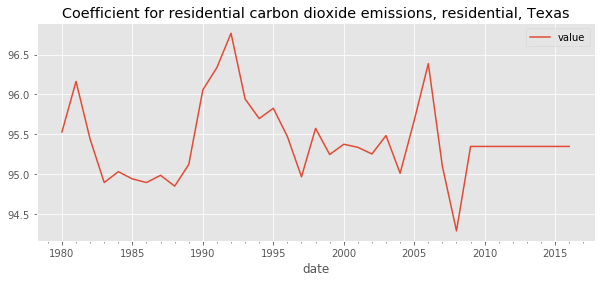

In [79]:
co2_tx_series_02.plot(figsize=(10,4))
plt.title(name_02)
plt.show()

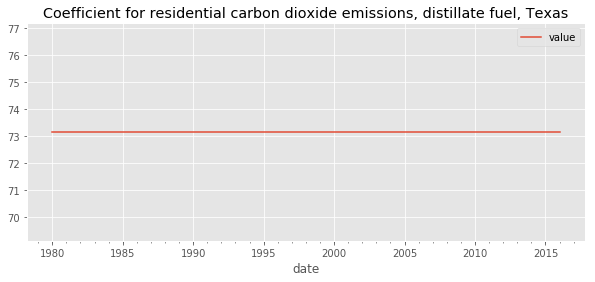

In [80]:
series_id = co2_tx_series_id[2]
name, co2_tx_series = api_series_to_df(series_id,API_KEY)

co2_tx_series.plot(figsize=(10,4))
plt.title(name)
plt.show()

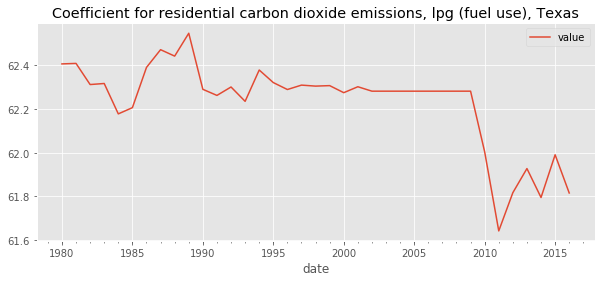

In [81]:
series_id = co2_tx_series_id[3]
name, co2_tx_series = api_series_to_df(series_id,API_KEY)

co2_tx_series.plot(figsize=(10,4))
plt.title(name)
plt.show()

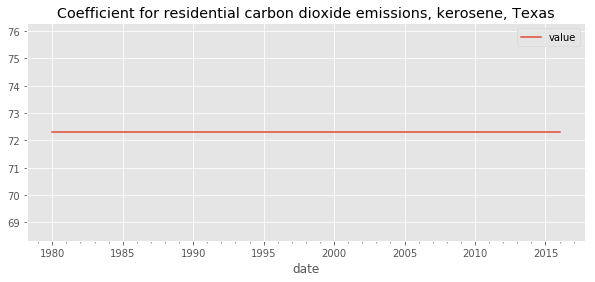

In [82]:
series_id = co2_tx_series_id[4]
name, co2_tx_series = api_series_to_df(series_id,API_KEY)

co2_tx_series.plot(figsize=(10,4))
plt.title(name)
plt.show()

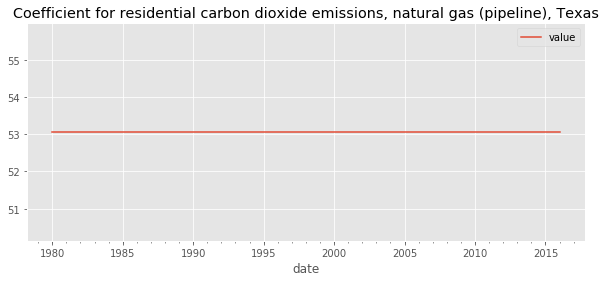

In [83]:
series_id = co2_tx_series_id[5]
name, co2_tx_series = api_series_to_df(series_id,API_KEY)

co2_tx_series.plot(figsize=(10,4))
plt.title(name)
plt.show()

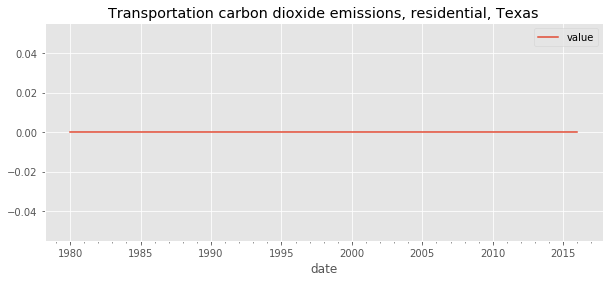

In [84]:
series_id = co2_tx_series_id[6]
name, co2_tx_series = api_series_to_df(series_id,API_KEY)

co2_tx_series.plot(figsize=(10,4))
plt.title(name)
plt.show()

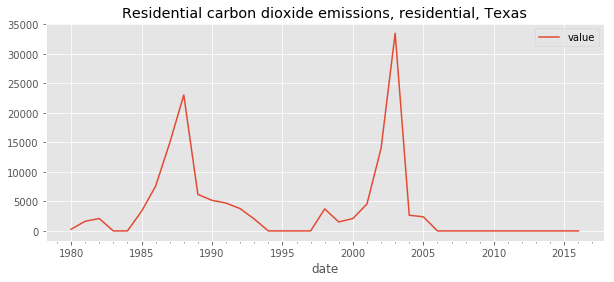

In [85]:
series_id = co2_tx_series_id[7]
name, co2_tx_series = api_series_to_df(series_id,API_KEY)

co2_tx_series.plot(figsize=(10,4))
plt.title(name)
plt.show()

In [87]:
co2_tx_series_id

['EMISS.CO2-C-CLACB-TX.A',
 'EMISS.CO2-C-CLRCB-TX.A',
 'EMISS.CO2-C-DFRCB-TX.A',
 'EMISS.CO2-C-HLRCB-TX.A',
 'EMISS.CO2-C-KSRCB-TX.A',
 'EMISS.CO2-C-NNRCB-TX.A',
 'EMISS.CO2-V-CLACB-TX.A',
 'EMISS.CO2-V-CLRCB-TX.A']

## Create a function
- input list of series_id
- returns dataframe with data


```python
def api_series(series_id,api_key):
    '''calls api returns json data'''
    url = 'http://api.eia.gov/series/'
    payload = {'api_key':api_key,
               'series_id':series_id}
    r = requests.get(url, params=payload)
    return r.json()


def data_frame(dic):
    '''convert dictionary data into dataframe'''
    # if statement to convert date
    if dic['series'][0]['f'] == 'M':
        #201002
        fmat = '%Y%m'
    else:
        fmat= None
    # select data
    plot_data = dic['series'][0]['data']
    # create dataframe
    df = pd.DataFrame.from_dict(plot_data)
    # rename cols
    df.rename(columns={0: 'date',1: 'value',}, 
              inplace=True)
    # change to datetime index
    df.date = pd.to_datetime(df['date'],format=fmat)
    df.set_index('date', inplace=True)
    return df


def api_series_to_df(series_id,api_key):
    '''combine two function to return
    data from api call'''
    json_data = api_series(series_id,api_key)
    name = json_data['series'][0]['name']
    df = data_frame(json_data)
    return name,df


```

In [98]:
for i in co2_tx_series_id:
    print(i)

EMISS.CO2-C-CLACB-TX.A
EMISS.CO2-C-CLRCB-TX.A
EMISS.CO2-C-DFRCB-TX.A
EMISS.CO2-C-HLRCB-TX.A
EMISS.CO2-C-KSRCB-TX.A
EMISS.CO2-C-NNRCB-TX.A
EMISS.CO2-V-CLACB-TX.A
EMISS.CO2-V-CLRCB-TX.A


In [97]:
for i in range(len(co2_tx_series_id)):
    print(co2_tx_series_id[i])

EMISS.CO2-C-CLACB-TX.A
EMISS.CO2-C-CLRCB-TX.A
EMISS.CO2-C-DFRCB-TX.A
EMISS.CO2-C-HLRCB-TX.A
EMISS.CO2-C-KSRCB-TX.A
EMISS.CO2-C-NNRCB-TX.A
EMISS.CO2-V-CLACB-TX.A
EMISS.CO2-V-CLRCB-TX.A


In [121]:
ddf = {}
for i in co2_tx_series_id:
    json_data = api_series(i,API_KEY)
    name = json_data['series'][0]['series_id']
    frame_data = data_frame(json_data)
    ddf[name] = frame_data

In [122]:
for i in ddf.keys():
    print(i)

EMISS.CO2-C-CLACB-TX.A
EMISS.CO2-C-CLRCB-TX.A
EMISS.CO2-C-DFRCB-TX.A
EMISS.CO2-C-HLRCB-TX.A
EMISS.CO2-C-KSRCB-TX.A
EMISS.CO2-C-NNRCB-TX.A
EMISS.CO2-V-CLACB-TX.A
EMISS.CO2-V-CLRCB-TX.A


In [124]:
pd.DataFrame.from_dict(ddf, orient='index')

,0
EMISS.CO2-C-CLACB-TX.A,value date 20...
EMISS.CO2-C-CLRCB-TX.A,value date 20...
EMISS.CO2-C-DFRCB-TX.A,value date 2016-01-01...
EMISS.CO2-C-HLRCB-TX.A,value date 20...
EMISS.CO2-C-KSRCB-TX.A,value date 20...
EMISS.CO2-C-NNRCB-TX.A,value date 20...
EMISS.CO2-V-CLACB-TX.A,value date 2016-01-01...
EMISS.CO2-V-CLRCB-TX.A,value date ...


In [116]:
json_data = api_series('EMISS.CO2-C-CLACB-TX.A',API_KEY)

In [120]:
json_data['series'][0]['series_id']

'EMISS.CO2-C-CLACB-TX.A'

In [170]:
ddf = pd.DataFrame()
ddf

""


In [173]:
for i in co2_tx_series_id:
    json_data = api_series(i,API_KEY)
    name = json_data['series'][0]['series_id']
    frame_data = data_frame_name(json_data)
    ddf[name] = frame_data.iloc[:, 1]
ddf.set_index(frame_data.iloc[:, 0], inplace=True)


In [202]:
ddf.iloc[:, 0:7].columns

Index(['EMISS.CO2-C-CLACB-TX.A', 'EMISS.CO2-C-CLRCB-TX.A',
       'EMISS.CO2-C-DFRCB-TX.A', 'EMISS.CO2-C-HLRCB-TX.A',
       'EMISS.CO2-C-KSRCB-TX.A', 'EMISS.CO2-C-NNRCB-TX.A',
       'EMISS.CO2-V-CLACB-TX.A'],
      dtype='object')

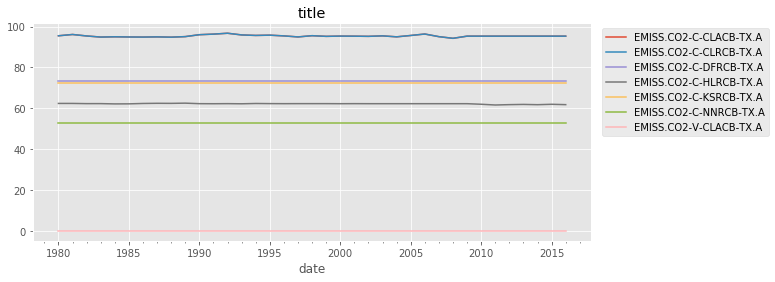

In [237]:
ax = ddf.iloc[:, 0:7].plot(figsize=(10,4))
#ax.legend(bbox_to_anchor=(1.0, 0.8))
#ax.legend( loc='center')
ax.legend(bbox_to_anchor=(1.01, 1))
plt.title('title')
plt.show()

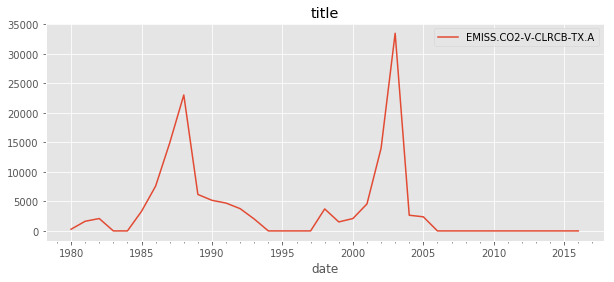

In [247]:
#ddf.iloc[:, 0:7].columns
ddf.iloc[:, 7:8].plot(figsize=(10,4))
ax.legend(bbox_to_anchor=(1.01, 1))
plt.title('title')
plt.show()

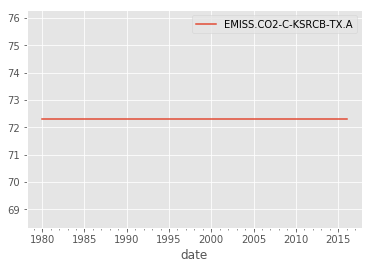

In [250]:
ddf[['EMISS.CO2-C-KSRCB-TX.A']].plot()
#EMISS.CO2-V-KSRCB-TX.A

## EIA Data Sets > Petroleum > Prices > Weekly Retail Gasoline and Diesel Prices > by Product > Gasoline - All Grades

`http://api.eia.gov/category/?api_key=YOUR_API_KEY_HERE&category_id=241021`

In [253]:
category_id = '241021'
gas_all = api_category(category_id,API_KEY)

In [255]:
gas_all.keys()

dict_keys(['request', 'category'])

In [258]:
for i in gas_all['category'].keys():
    print(i)

category_id
parent_category_id
name
notes
childcategories
childseries


In [259]:
gas_all['category']['name']

'Gasoline - All Grades'

In [263]:
gas_all['category']['childseries'][0].keys()

dict_keys(['series_id', 'name', 'f', 'units', 'updated'])

In [268]:
gas_all_df = pd.DataFrame.from_dict(gas_all['category']['childseries'])

In [331]:
hou_filter = gas_all_df.name.str.contains('houston',case=False)
tx_filter = gas_all_df.name.str.contains('texas',case=False)
ca_filter = gas_all_df.name.str.contains('cal',case=False)
ny_filter = gas_all_df.name.str.contains('New',case=False)

In [332]:
gas_all_df[hou_filter]

,f,name,series_id,units,updated
66,A,Houston All Grades All Formulations Retail Gas...,PET.EMM_EPM0_PTE_Y44HO_DPG.A,Dollars per Gallon,02-JAN-18 05.26.32 PM
67,M,Houston All Grades All Formulations Retail Gas...,PET.EMM_EPM0_PTE_Y44HO_DPG.M,Dollars per Gallon,26-NOV-18 05.24.54 PM
68,W,Houston All Grades All Formulations Retail Gas...,PET.EMM_EPM0_PTE_Y44HO_DPG.W,Dollars per Gallon,26-DEC-18 04.36.10 PM


In [333]:
gas_all_df[tx_filter]

,f,name,series_id,units,updated
51,A,Texas All Grades All Formulations Retail Gasol...,PET.EMM_EPM0_PTE_STX_DPG.A,Dollars per Gallon,02-JAN-18 05.26.32 PM
52,M,Texas All Grades All Formulations Retail Gasol...,PET.EMM_EPM0_PTE_STX_DPG.M,Dollars per Gallon,26-NOV-18 05.24.54 PM
53,W,Texas All Grades All Formulations Retail Gasol...,PET.EMM_EPM0_PTE_STX_DPG.W,Dollars per Gallon,26-DEC-18 04.36.10 PM


## Select
- `PET.EMM_EPM0_PTE_Y44HO_DPG.W`
- `PET.EMM_EPM0_PTE_STX_DPG.W`

In [334]:
series_id_hou = 'PET.EMM_EPM0_PTE_Y44HO_DPG.W'  # hou
series_id_tx = 'PET.EMM_EPM0_PTE_STX_DPG.W'  # TX
series_id_ca = 'PET.EMM_EPM0_PTE_SCA_DPG.W'  # CA
series_id_ny = 'PET.EMM_EPM0_PTE_SNY_DPG.W'  #NY

In [318]:
ca_gas_weekly = api_series_to_df(series_id_ca,API_KEY)

In [325]:
ny_gas_weekly = api_series_to_df(series_id_ny,API_KEY)
hou_gas_weekly = api_series_to_df(series_id_hou,API_KEY)
tx_gas_weekly = api_series_to_df(series_id_tx,API_KEY)

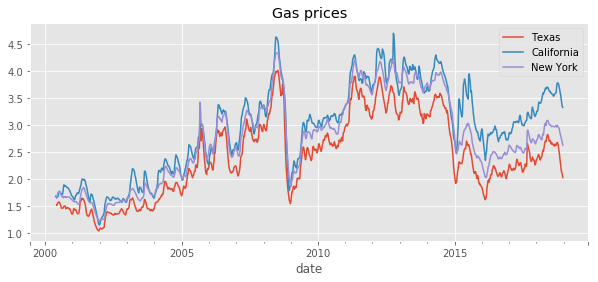

In [335]:
ax = tx_gas_weekly.plot(figsize=(10,4))
#hou_gas_weekly.plot(ax=ax)
ca_gas_weekly.plot(ax=ax)
ny_gas_weekly.plot(ax=ax)
ax.legend(["Texas",'California','New York'])
plt.title('Gas prices')
plt.show()